In [6]:
import napari
from octopuslite import DaskOctopusLiteLoader

import numpy as np
import cv2
import os

In [ ]:
cap = cv2.VideoCapture('/mnt/DATA/sandbox/pierre_live_cell_data/shared/Single_field_Mtb_IPSDM_CTRL_1.avi')

ret, frame = cap.read()
print(ret)
print(np.shape(frame))

In [4]:
from skimage.io import imshow

In [5]:
imshow(frame[0])

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/manage_plugins.py:207: FutureWarning: `qt` plugin is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  return func(*args, **kwargs)


In [3]:
from matplotlib.pyplot import imshow

In [7]:
frame[0]

array([[ 0,  0,  0],
       [ 0,  2,  2],
       [ 0,  2,  0],
       ...,
       [ 0, 34,  6],
       [ 1, 32,  7],
       [ 0, 30,  5]], dtype=uint8)

In [6]:
frame[...,0]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 1, ..., 4, 2, 3]], dtype=uint8)

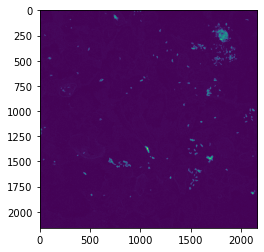

In [8]:
imshow(frame[...,0])

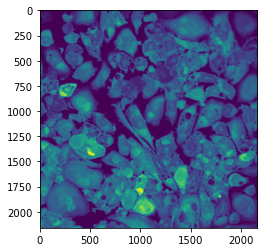

In [9]:
imshow(frame[...,1])

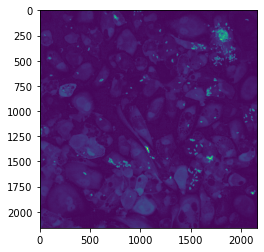

In [10]:
imshow(frame[...,2])

In [5]:
viewer = napari.Viewer()
viewer.add_image(frame[...,1], name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')

<Image layer 'gfp' at 0x7fc1450ebd00>

In [8]:
from skimage.io import imread

In [9]:
tiff = imread('/mnt/DATA/sandbox/pierre_live_cell_data/shared/tiff/HC_Mtb_IPSDM_RIF_1.tif')

In [10]:
viewer = napari.Viewer()
viewer.add_image(tiff, name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')

<Image layer 'gfp' at 0x7fc15e1c9a90>

In [11]:
tiff = imread('/home/dayn/Pictures/jwst.tif')

In [12]:
viewer = napari.Viewer()
viewer.add_image(tiff, name="cosmic cliffs", 
                 contrast_limits=[0,255],
                 blending = 'additive',)

<Image layer 'cosmic cliffs' at 0x7fc15df4b040>

In [13]:
viewer = napari.Viewer()


copying some files down

In [ ]:
from tqdm.auto import tqdm
import shutil
import os
import glob
from natsort import natsorted

In [23]:
len(os.listdir('/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/outputs/light_microscopy/Pierre SANTUCCI/Replication_IPSDM_GFP/Live_Cell_ATB_PS_20210416__2021-04-16T19_09_04-Measurement 1/Images'))

113400

In [25]:
path = '/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/outputs/light_microscopy/Pierre SANTUCCI/Replication_IPSDM_GFP/Live_Cell_ATB_PS_20210416__2021-04-16T19_09_04-Measurement 1/Images'

In [39]:
%%timeit

image_fns = glob.glob(path+'/*')[0:100]

24 s ± 827 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%time

image_fns = glob.glob(path+'/*')

CPU times: user 452 ms, sys: 55.5 ms, total: 508 ms
Wall time: 22.8 s


In [48]:
len(image_fns)

113400

In [56]:
from hurry.filesize import size, si

In [62]:
%%time

file_size = sum(os.path.getsize(f) for f in image_fns if os.path.isfile(f))

size(file_size, system = si)

CPU times: user 9.38 s, sys: 7.59 s, total: 17 s
Wall time: 27min 52s


'664G'

In [68]:
new_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images'

In [73]:
for fn in tqdm(image_fns):
    base_fn = os.path.basename(fn)
    new_fn = os.path.join(new_dir, base_fn)
    if not os.path.exists(new_fn):
        shutil.copy2(fn, new_fn)

100%|████████████████████████████████████████████████████████| 113400/113400 [1:22:11<00:00, 22.99it/s]


In [72]:
fn

'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/outputs/light_microscopy/Pierre SANTUCCI/Replication_IPSDM_GFP/Live_Cell_ATB_PS_20210416__2021-04-16T19_09_04-Measurement 1/Images/r03c08f04p02-ch1sk35fk1fl1.tiff'

checking filename pattern

In [65]:
[os.path.basename(fn) for fn in image_fns if 'r03c03f01p01' in fn]

['r03c03f01p01-ch1sk25fk1fl1.tiff',
 'r03c03f01p01-ch2sk61fk1fl1.tiff',
 'r03c03f01p01-ch1sk51fk1fl1.tiff',
 'r03c03f01p01-ch2sk8fk1fl1.tiff',
 'r03c03f01p01-ch2sk51fk1fl1.tiff',
 'r03c03f01p01-ch1sk62fk1fl1.tiff',
 'r03c03f01p01-ch2sk68fk1fl1.tiff',
 'r03c03f01p01-ch1sk10fk1fl1.tiff',
 'r03c03f01p01-ch2sk50fk1fl1.tiff',
 'r03c03f01p01-ch2sk38fk1fl1.tiff',
 'r03c03f01p01-ch2sk65fk1fl1.tiff',
 'r03c03f01p01-ch2sk70fk1fl1.tiff',
 'r03c03f01p01-ch1sk50fk1fl1.tiff',
 'r03c03f01p01-ch1sk37fk1fl1.tiff',
 'r03c03f01p01-ch2sk75fk1fl1.tiff',
 'r03c03f01p01-ch1sk31fk1fl1.tiff',
 'r03c03f01p01-ch2sk29fk1fl1.tiff',
 'r03c03f01p01-ch1sk3fk1fl1.tiff',
 'r03c03f01p01-ch1sk48fk1fl1.tiff',
 'r03c03f01p01-ch2sk39fk1fl1.tiff',
 'r03c03f01p01-ch2sk27fk1fl1.tiff',
 'r03c03f01p01-ch2sk48fk1fl1.tiff',
 'r03c03f01p01-ch2sk35fk1fl1.tiff',
 'r03c03f01p01-ch1sk43fk1fl1.tiff',
 'r03c03f01p01-ch2sk2fk1fl1.tiff',
 'r03c03f01p01-ch2sk69fk1fl1.tiff',
 'r03c03f01p01-ch2sk55fk1fl1.tiff',
 'r03c03f01p01-ch2sk64fk1fl1.ti

copying only specific files across

In [66]:
new_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/r03c03f01p01'
for fn in tqdm([fn for fn in image_fns if 'r03c03f01p01' in fn]):
    base_fn = os.path.basename(fn)
    new_fn = os.path.join(new_dir, base_fn)
    if not os.path.exists(new_fn):
        shutil.copy2(fn, new_fn)

100%|████████████████████████████████████████████████████████████████| 150/150 [00:22<00:00,  6.66it/s]
